In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
from eurostatlib.crimetable import EurostatCrimeTable

crime_table = EurostatCrimeTable()

geo_df = pd.read_csv(r'data\geo.csv')
iccs_df = pd.read_csv(r'data\iccs.csv')

crime_table.load_data(f'data/estat_crim_off_cat.tsv', geo_df, iccs_df)

In [3]:
country = widgets.Dropdown(
    options=crime_table.country_list_sorted,
    value=crime_table.country_list_sorted[0],
    description='Country:',
    disabled=False,
    )
crime = widgets.Dropdown(
    options=crime_table.crime_list_sorted,
    value=crime_table.crime_list_sorted[0],
    description='Crime:',
    disabled=False,
    )
display(country)
display(crime)

Dropdown(description='Country:', options=('Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria…

Dropdown(description='Crime:', options=('Acts against computer systems', 'Attempted intentional homicide', 'Br…

In [4]:
select_country = country.value
select_crime = crime.value
crime_table.filter_data(select_country, select_crime)
crime_table.filtered_data
crime_table.crime_category
# crime_table.statistics_info

'visible'

In [5]:
years_range = widgets.IntRangeSlider(
    value=[crime_table.statistics.first_fill_year, crime_table.statistics.last_fill_year],
    min=crime_table.statistics.first_fill_year,
    max=crime_table.statistics.last_fill_year,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,   
    readout_format='d',

)
years_range

IntRangeSlider(value=(2008, 2022), continuous_update=False, description='Years:', max=2022, min=2008)

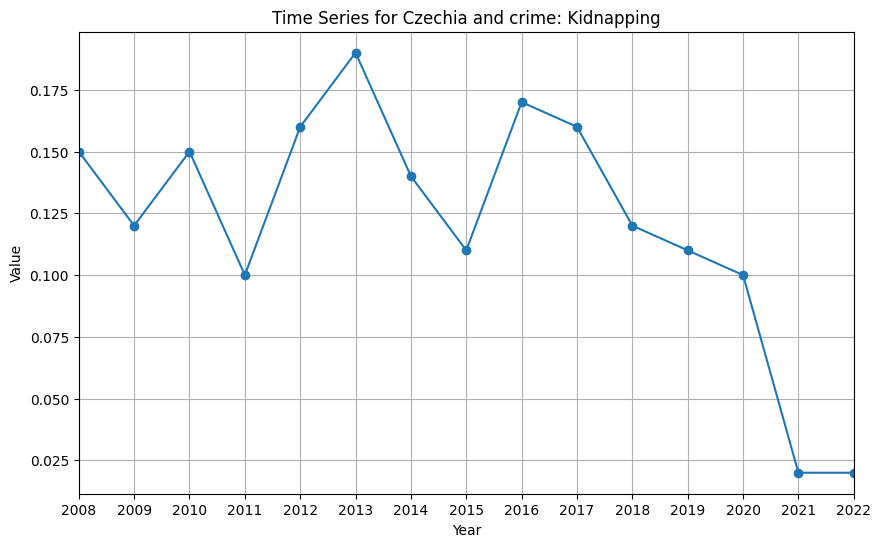

In [6]:
from IPython.display import display, HTML
crime_dict_info = crime_table.statistics.statistics_dictionary

text = f"""
<h2>Graph information:</h2>
<p><b>Country:</b> {select_country}</p>
<p><b>Crime:</b> {select_crime}</p>
<p>{crime_table.statistics_info}</p>
<p><b>min value:</b> {crime_dict_info['min_value']} ({crime_dict_info['min_value_year']})</p>
<p><b>max value:</b> {crime_dict_info['max_value']} ({crime_dict_info['max_value_year']})</p>
<p><b>mean value:</b> {crime_dict_info['mean_value']}</p>
<p><b>standard deviation:</b> {crime_dict_info['standard_deviation']}</p>
<p><b>crime category:</b> {crime_table.crime_category}</p>
<p><b>trend:</b> {crime_dict_info['trend']}</p>
<p><b>relative trend strenght:</b> {crime_dict_info['relative_trend_strength']}</p>
<p></p>
"""
display(HTML(text))

start_year, end_year = years_range.value
plt.figure(figsize=(10, 6))
plt.plot(crime_table.filtered_data['year'], crime_table.filtered_data['value'], marker='o')
plt.title(f"Time Series for {country.value} and crime: {crime.value}")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.xlim(start_year, end_year)
plt.xticks(range(start_year, end_year + 1, 1))
plt.show()